In [3]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 


import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [4]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [9]:
GND13Bid = candels[-1]

nearby = GND13Bid[1][1]
host = GND13Bid[1][2]

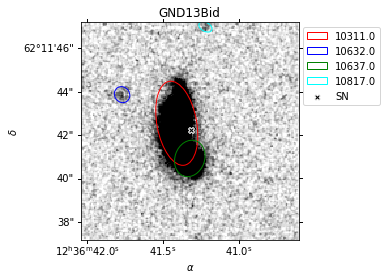

In [12]:
nick = GND13Bid[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Bid[1][0]['RA'],GND13Bid[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.0046,val_max = .0149 )

In [35]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot]])

id,z,z_spec,z_peak
str8,str8,str12,str12
10311,1.5300,1.5253,1.5551
10632,0.9400,-1.0000,0.9414
10637,0.5900,0.5850,0.5280
10817,1.5600,-1.0000,1.5635


## GND13Bid published as CC at spec-z~0.585 

The spec-z comes from the host. The postage stamp image seems to show spiral galaxy (id14530) as likely host w/ the SN being just slightly off from the galaxy center. The spiral 14530 has photo-z 0.554, spec-z 0.585. 

The SN has good lc fit for model Ic(CSP-2004fe) at Z~0.585. 

(There is another alt-host id 14561 with phot-z 1.43,spec-z 0.548)

My image doesn't resolve nearly as well (expected since I'm just using cutouts of the full field mosaics while I guess the postage stamp is from a follow-up/detection exposure).

My initial interpretation based on the two images is: 10311 ~ spiral 14530; 10637 ~ alt 14561
(no ra/dec in postage stamp, kind've hard to guess when I can't resolve nearly as well and the galaxies overlap)

Slightly confused/worried that ids aren't the same.  

Even moreso since if 10311 is in fact the spiral that seems to be the host based on better postage stamp, it has a zphot&zpec~1.53; would change the published redshift significantly

I may have this backwards though as 10637 has photz ~ 0.53, specz ~ 0.585. These are in line with the spiral 14530 which seems to be the host. If that is the case I don't have explanation for why 10311 doesn't correspond with the alt 14561.

## I think I just need to update 10637 to be the host in my catalog; published host,redshift stay the same.